In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Reading

In [ ]:
#Loading Dataset in python
missing_values = ["Unknown", "No reply", "NaN"]
df = pd.read_csv('/content/drive/MyDrive/Dataset/Group 1.csv')
df=df.iloc[:,1:]
df.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,Female,Lancashire,0,1,0,20.0,NaN,2,0,Churn=No
1,Female,Essex,0,1,0,4.0,NaN,1,5,Churn=No
2,Female,Essex,0,Unknown,1,9.0,NaN,2,0,Churn=No
3,Male,West Yorkshire,1,1,1,9.0,NaN,4,9,Churn=No
4,Male,Greater Manchester,0,1,0,6.0,NaN,2,5,Churn=No


# 1. Data Prepration

In [ ]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: gender - Unique Values: ['Female' 'Male']
Column: location - Unique Values: ['Lancashire' 'Essex' 'West Yorkshire' 'Greater Manchester'
 'West Midlands' 'Greater London' 'Merseyside' 'Hertfordshire' 'Devon'
 'North Yorkshire' 'Hampshire' 'Kent' 'Surrey' 'Staffordshire'
 'South Yorkshire' 'Nottinghamshire' 'Tyne and Wear']
Column: partner - Unique Values: [0 1]
Column: dependents - Unique Values: ['1' 'Unknown' '0']
Column: senior - Unique Values: [0 1]
Column: Tenure - Unique Values: [20.          4.          9.          6.          1.          8.
 10.         22.          0.          2.          7.          3.
 11.         23.         17.         12.         16.         18.
 24.         13.         15.          5.         14.         19.
 21.         -1.41421356 26.         -3.         -2.23606798 -2.82842713
 -4.47213595 -4.69041576 -3.60555127 25.         -4.         -4.79583152
 -3.87298335 -5.19615242 -4.24264069 -4.35889894 -3.31662479 -2.
 27.         29.         -2.4494

In [ ]:
# summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        7350 non-null   object 
 1   location      7350 non-null   object 
 2   partner       7350 non-null   int64  
 3   dependents    7350 non-null   object 
 4   senior        7350 non-null   int64  
 5   Tenure        7350 non-null   float64
 6   monthly_cost  79 non-null     object 
 7   package       7350 non-null   int64  
 8   survey        7350 non-null   object 
 9   Class         7291 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 574.3+ KB


In [ ]:
#Replacing monthly cost column values $ with blank
df.monthly_cost= df.monthly_cost.str.replace('$', '')
# Replacing values < 0 of Tenure column to 0
df.Tenure[df['Tenure'] < 0] = 0

In [ ]:
#Checking columns which have null values
df.isnull().sum()

gender             0
location           0
partner            0
dependents         0
senior             0
Tenure             0
monthly_cost    7271
package            0
survey             0
Class             59
dtype: int64

In [ ]:
# imputing survey and dependents column using median
median = df['survey'].median()
df['survey'].fillna(median, inplace=True)
mediand = df['dependents'].median()
df['dependents'].fillna(mediand, inplace=True)


TypeError: ignored

In [ ]:
# converting suitable datatypes
df['survey']=df['survey'].astype(int)
df['dependents']=df['dependents'].astype(int)
df['Tenure']=df['Tenure'].astype(int)
# replacing class column values to 0 and 1 and imputing values
df = df.replace({'Class': {'Churn=Yes': 1, 'Churn=No': 0,'Y$e$s$$': 1}})
medianc = df['Class'].median()
df['Class'].fillna(mediand, inplace=True)
df['Class']=df['Class'].astype(int)
# replacing gender column values to 0 or 1
df = df.replace({'gender': {'Female': 1, 'Male': 0}})
df['gender']=df['gender'].astype(int)
# converting location string values to integer numbers
df = df.replace({'location': {'Lancashire': 1, 'Essex': 2,'West Yorkshire': 3,'Greater Manchester':4,
                              'West Midlands':5,'West Midlands':6, 'Greater London':7,'Merseyside':8,
                              'Hertfordshire':9, 'Devon':10,'North Yorkshire':11, 'Hampshire':12,
                              'Kent':13, 'Surrey':14, 'Staffordshire':15,'South Yorkshire':16,
                              'Nottinghamshire':17, 'Tyne and Wear':18}})
df.isnull().sum()

ValueError: ignored

In [ ]:
# dropping monthly cost column
df.drop(['monthly_cost'], axis = 1, inplace = True)
df.head(5)

,customer_id,gender,location,partner,dependents,senior,Tenure,package,survey,Class
0,G1606,1,1,0,1,0,20,2,0,0
1,F8889,1,2,0,1,0,4,1,5,0
2,C5068,1,2,0,1,1,9,2,0,0
3,G9820,0,3,1,1,1,9,4,9,0
4,H7261,0,4,0,1,0,6,2,5,0


In [ ]:
# get distinct values of the dataframe based on column customer_id
df = df.drop_duplicates(subset = ["customer_id"])
df.head()

,customer_id,gender,location,partner,dependents,senior,Tenure,package,survey,Class
0,G1606,1,1,0,1,0,20,2,0,0
1,F8889,1,2,0,1,0,4,1,5,0
2,C5068,1,2,0,1,1,9,2,0,0
3,G9820,0,3,1,1,1,9,4,9,0
4,H7261,0,4,0,1,0,6,2,5,0


In [ ]:
# caculating monthly_cost column
df['cost'] = df['Tenure'].apply(lambda x: 50 if x>25 else 2*x)
df['cost1'] = df['package'].apply(lambda x: 26 if x==1 else 0)
df['cost2'] = df['package'].apply(lambda x: 34 if x==2 else 0)
df['cost3'] = df['package'].apply(lambda x: 40 if x==3 else 0)
df['cost4'] = df['package'].apply(lambda x: 50 if x==4 else 0)
df['total']=df['cost1']+df['cost2']+df['cost3']+df['cost4']
df['monthly_cost']=df['total']-((df['total']*df['cost'])/100)
df.drop(['cost','cost1','cost2','cost3','cost4','total'], axis = 1, inplace = True)
df.head(5)

,customer_id,gender,location,partner,dependents,senior,Tenure,package,survey,Class,monthly_cost
0,G1606,1,1,0,1,0,20,2,0,0,20.40
1,F8889,1,2,0,1,0,4,1,5,0,23.92
2,C5068,1,2,0,1,1,9,2,0,0,27.88
3,G9820,0,3,1,1,1,9,4,9,0,41.00
4,H7261,0,4,0,1,0,6,2,5,0,29.92


In [ ]:
df.shape

(6770, 11)

# 2. EDA

0    4787
1    1983
Name: Class, dtype: int64


Text(0.5, 1.0, 'Target Variable "Class" Distribution')

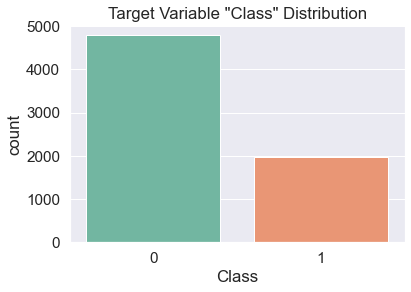

In [ ]:
print(df.Class.value_counts())
sns.countplot('Class', data=df, palette="Set2").set_title('Target Variable "Class" Distribution')

Now, we will see how many binary catagorical columns we have

In [ ]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
binary_cols

['gender', 'partner', 'dependents', 'senior', 'Class']

<AxesSubplot:xlabel='senior', ylabel='count'>

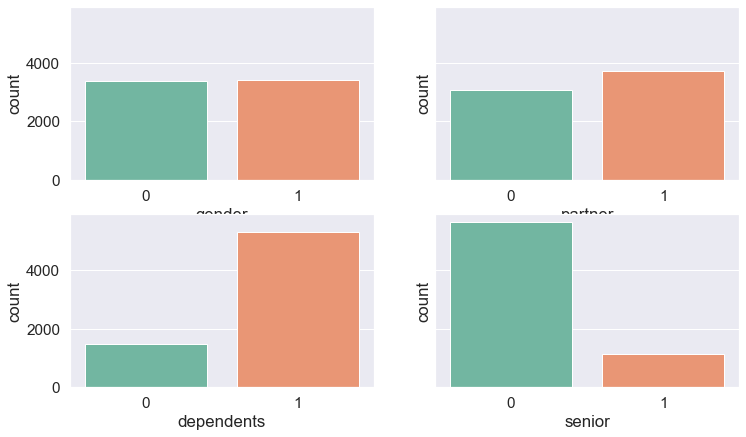

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0],palette="Set2")
sns.countplot("partner", data=df, ax=axes[0,1],palette="Set2")
sns.countplot("dependents", data=df, ax=axes[1,0],palette="Set2")
sns.countplot("senior", data=df, ax=axes[1,1],palette="Set2")

It is better to check how the target variable (churn) changes according to the binary features.Let’s see if churn rate is different for gender , partner, dependents, senior. we can see that gender column does not make an impact on the class column since for males and females their percentage is same. however other features make solid impact since their percentage differs a lot.

In [ ]:
print(df[['gender','Class']].groupby(['gender']).mean())
print(df[['partner','Class']].groupby(['partner']).mean())
print(df[['dependents','Class']].groupby(['dependents']).mean())
print(df[['senior','Class']].groupby(['senior']).mean())

           Class
gender          
0       0.291173
1       0.294638
            Class
partner          
0        0.431699
1        0.178437
               Class
dependents          
0           0.682003
1           0.184240
           Class
senior          
0       0.282925
1       0.342430


## Now we will explore continuous variable data


Text(0.5, 1.0, 'package column countplot')

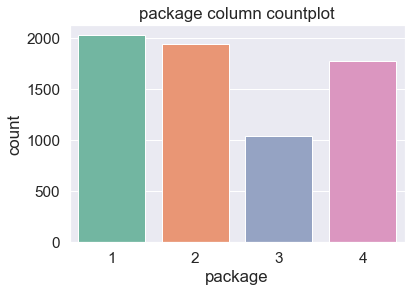

In [ ]:
#lets start with package feature
sns.countplot("package", data=df,palette="Set2").set_title('package column countplot')

In [ ]:
print(df[['package','Class']].groupby(['package']).mean())
print(df[['package','monthly_cost']].groupby(['package']).mean())

            Class
package          
1        0.398715
2        0.335054
3        0.214629
4        0.171751
         monthly_cost
package              
1           21.943024
2           28.283015
3           32.274880
4           40.340113


package column is very important in predicting churn rate, as you can see we have most of the customers for package 1 followed by 2,4,3. however if we look at the churn rate of it we see that customers which have package 1 and 2 are most likely to churn although their mothly charges are lowest. Whereas, for the package 3 and package 4, there are almost 50% less chances that they will churn and their prices for package are almost double.

Text(0.5, 1.0, 'survey column countplot')

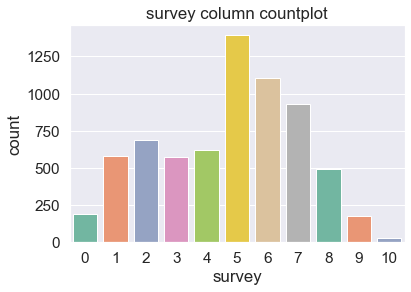

In [ ]:
#lets look for survey feature
sns.countplot("survey", data=df,palette="Set2").set_title('survey column countplot')

In [ ]:
print(df[['survey','Class']].groupby(['survey']).mean())

           Class
survey          
0       0.772487
1       0.761578
2       0.745985
3       0.555944
4       0.246377
5       0.174444
6       0.069683
7       0.061489
8       0.048583
9       0.045977
10      0.074074


we can see that customers who have given good points in the feedback they are less likely to churn.

Text(0.5, 1.0, 'Tenure column countplot')

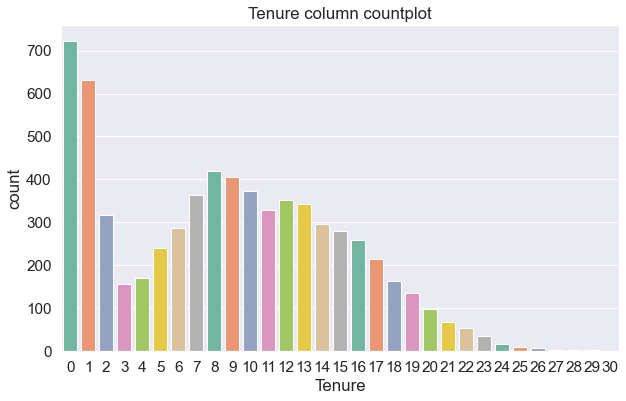

In [ ]:
#lets explore Tenure featurre now
plt.figure(figsize=(10, 6))
sns.countplot("Tenure", data=df,palette="Set2").set_title('Tenure column countplot')

In [ ]:
print(df[['Tenure','Class']].groupby(['Tenure']).mean())

           Class
Tenure          
0       0.636238
1       0.719493
2       0.710692
3       0.554140
4       0.304094
5       0.183333
6       0.191638
7       0.189560
8       0.209524
9       0.147783
10      0.168449
11      0.161094
12      0.156250
13      0.122093
14      0.117845
15      0.099644
16      0.100386
17      0.093023
18      0.115854
19      0.103704
20      0.112245
21      0.115942
22      0.072727
23      0.114286
24      0.117647
25      0.181818
26      0.125000
27      0.000000
28      0.000000
29      0.500000
30      0.000000


New customers like 0,1,2, year more likely to churn rather than long period customers.


Let us now discuss location, monthlycharge and Tenure column.

According to the distribution of tenure variable, most of the customers are either pretty new or have stayed for a long time with the company.
A similar trend is seen on MonthlyCharges. There seems to be a gap between low rates and high rates.
Let’s check how churn rate changes according to tenure and MonthlyCharges:

In [ ]:
print(df[['Tenure','monthly_cost','Class']].groupby(['Class']).mean())

          Tenure  monthly_cost
Class                         
0      10.482348     29.910917
1       4.571861     30.735714


It is clear that people who have been a customer for a long time tend to stay with the company. The average tenure in years for people who left the company is 5 and less.
It seems like monthly charges also have an effect on churn rate and customers are ready to pay good amount for good service.

Text(0.5, 1.0, 'location column countplot')

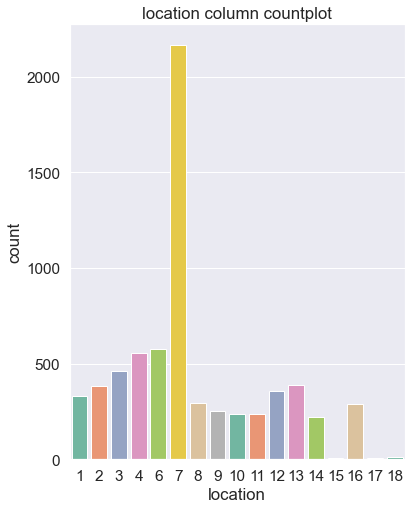

In [ ]:
#lets explore location feature now
plt.figure(figsize=(6, 8))
sns.countplot("location", data=df,palette="Set2").set_title('location column countplot')

In [ ]:
print(df[['location','monthly_cost','Class']].groupby(['location']).mean())

          monthly_cost     Class
location                        
1            30.741455  0.245455
2            29.980157  0.257218
3            29.568156  0.236443
4            29.766679  0.240575
6            29.861384  0.250865
7            30.443954  0.383834
8            30.887211  0.214286
9            29.557450  0.254980
10           29.940336  0.285714
11           29.802700  0.232068
12           29.860168  0.243697
13           29.904041  0.240933
14           30.338727  0.295455
15           32.280000  0.222222
16           30.515848  0.287197
17           30.288000  0.600000
18           29.663333  0.166667


In [ ]:
df.head()
df.drop(['customer_id'], axis=1, inplace=True)

# 3. Data Preprocessing

[0.02236592 0.11346045 0.06219658 0.15791658 0.06470434 0.18824694
 0.03159042 0.27192449 0.08759428] Index(['gender', 'location', 'partner', 'dependents', 'senior', 'Tenure',
       'package', 'survey', 'monthly_cost'],
      dtype='object')


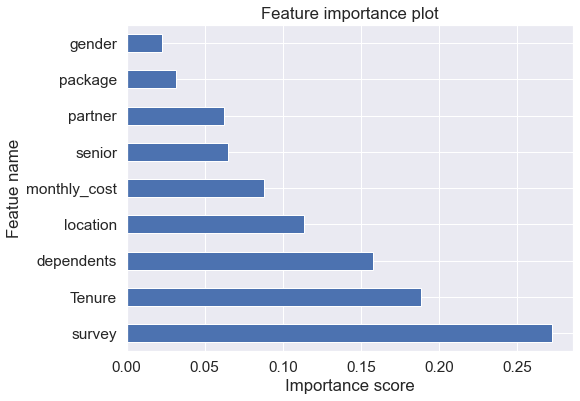

In [ ]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data

model = ExtraTreesClassifier()
model.fit(df.drop('Class', axis=1), df['Class'])
# display the relative importance of each attribute
print(model.feature_importances_, df.drop('Class', axis=1).columns)
plt.figure(figsize=(8,6))
feat_importances = pd.Series(model.feature_importances_, index=df.drop('Class', axis=1).columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Feature importance plot")
plt.xlabel("Importance score")
plt.ylabel("Featue name")
plt.show()

In [ ]:
df.drop(['gender'], axis=1, inplace=True)

In [ ]:
#importing libraries for encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#importing libraries for data normalization
from sklearn.preprocessing import MinMaxScaler
df.head()

,location,partner,dependents,senior,Tenure,package,survey,Class,monthly_cost
0,1,0,1,0,20,2,0,0,20.40
1,2,0,1,0,4,1,5,0,23.92
2,2,0,1,1,9,2,0,0,27.88
3,3,1,1,1,9,4,9,0,41.00
4,4,0,1,0,6,2,5,0,29.92


In [ ]:
#Encoding location column:
cat_features = ['location']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)
X.head()

,partner,dependents,senior,Tenure,package,survey,Class,monthly_cost,location_2,location_3,...,location_9,location_10,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18
0,0,1,0,20,2,0,0,20.40,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,4,1,5,0,23.92,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,9,2,0,0,27.88,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,9,4,9,0,41.00,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,6,2,5,0,29.92,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Scaling continuous variables:
sc = MinMaxScaler()
t = sc.fit_transform(df[['Tenure']])
m = sc.fit_transform(df[['monthly_cost']])
s = sc.fit_transform(df[['survey']])
X['tenure'] = t
X['monthly_cost'] = m
X['survey'] = s
X.shape

(6770, 25)

In [ ]:
#Data after encoding and normalization
X.head()

,partner,dependents,senior,Tenure,package,survey,Class,monthly_cost,location_2,location_3,...,location_10,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,tenure
0,0,1,0,20,2,0.0,0,0.200000,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
1,0,1,0,4,1,0.5,0,0.295135,1,0,...,0,0,0,0,0,0,0,0,0,0.133333
2,0,1,1,9,2,0.0,0,0.402162,1,0,...,0,0,0,0,0,0,0,0,0,0.300000
3,1,1,1,9,4,0.9,0,0.756757,0,1,...,0,0,0,0,0,0,0,0,0,0.300000
4,0,1,0,6,2,0.5,0,0.457297,0,0,...,0,0,0,0,0,0,0,0,0,0.200000


Text(0.5, 1.0, 'Class Distribution Before Resampling')

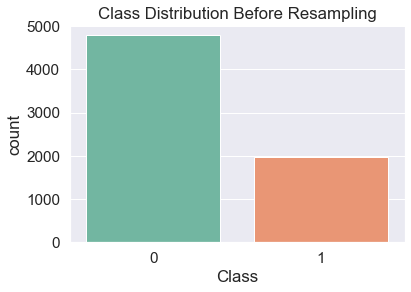

In [ ]:
#Resampling
sns.countplot('Class', data=df,palette="Set2").set_title('Class Distribution Before Resampling')

4787


Text(0.5, 1.0, 'Class Distribution After Resampling')

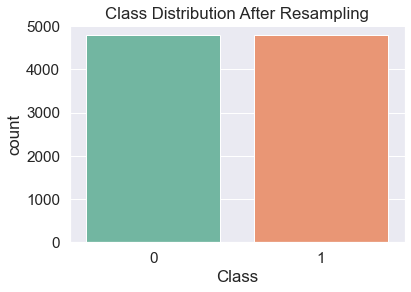

In [ ]:
#Separating positive class (churn=yes) and negative class (churn=no):
X_no = X[X.Class == 0]
X_yes = X[X.Class == 1]
#Upsampling the positive class:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))
#Combining positive and negative class and checking class distribution:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Class', data=X_upsampled,palette="Set2").set_title('Class Distribution After Resampling')

# 4. Developing and testing machine learning models

We need to divide the dataset into training and test subsets so that we are able to measure the performance of our model on new, previously unseen examples.



In [ ]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Class'], axis=1) #features (independent variables)
y = X_upsampled['Class'] #target (dependent variable)

In [ ]:
#diving into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
fig, ax=plt.subplots(figsize=(9, 4))
X_train.plot(ax=ax, label='train')
X_test.plot(ax=ax, label='test')
ax.legend();

NameError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### K_nearest _neighbor

In [ ]:
knb = KNeighborsClassifier()
knb.fit(X_train, y_train)
# print best parameter after tuning
# make the predictions
knb_pred = knb.predict(X_test)
# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, knb_pred)
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, knb_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       987
           1       0.84      0.87      0.86       928

    accuracy                           0.86      1915
   macro avg       0.86      0.86      0.86      1915
weighted avg       0.86      0.86      0.86      1915



Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

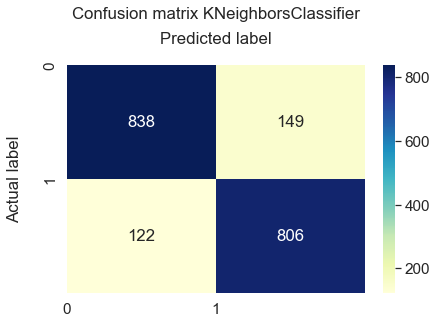

In [ ]:
#visualize Confusion Matrix:
pd.crosstab(y_test,pd.Series(knb_pred),
rownames=['ACTUAL'],colnames=['PRED'])
# cm = confusion_matrix(y_test, Gbc_pred)
df_cm = pd.DataFrame(confusion_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix KNeighborsClassifier\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### Logistic regression

In [ ]:
Lg = LogisticRegression()
Lg.fit(X_train, y_train)
# make the predictions
Lg_pred = Lg.predict(X_test)
# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Lg_pred)
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Lg_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       987
           1       0.86      0.87      0.86       928

    accuracy                           0.87      1915
   macro avg       0.87      0.87      0.87      1915
weighted avg       0.87      0.87      0.87      1915



Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

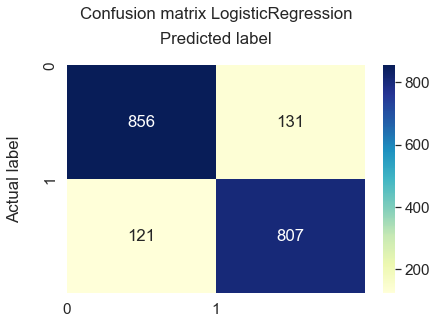

In [ ]:
#visualize Confusion Matrix:
pd.crosstab(y_test,pd.Series(Lg_pred),
rownames=['ACTUAL'],colnames=['PRED'])
# cm = confusion_matrix(y_test, Gbc_pred)
df_cm = pd.DataFrame(confusion_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix LogisticRegression\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### SVC

In [ ]:
Svc = SVC()
Svc.fit(X_train, y_train)
# make the predictions
Svc_pred = Svc.predict(X_test)
# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Svc_pred)
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Svc_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       987
           1       0.86      0.85      0.86       928

    accuracy                           0.86      1915
   macro avg       0.86      0.86      0.86      1915
weighted avg       0.86      0.86      0.86      1915



Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

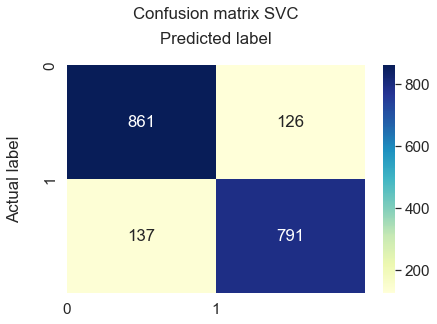

In [ ]:
#visualize Confusion Matrix:
pd.crosstab(y_test,pd.Series(Svc_pred),
rownames=['ACTUAL'],colnames=['PRED'])
# cm = confusion_matrix(y_test, Gbc_pred)
df_cm = pd.DataFrame(confusion_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix SVC\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### Random Forest Classifier

In [ ]:
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)
# make the predictions
Rfc_pred = Rfc.predict(X_test)
# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Rfc_pred)
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       987
           1       0.91      0.96      0.93       928

    accuracy                           0.94      1915
   macro avg       0.94      0.94      0.94      1915
weighted avg       0.94      0.94      0.94      1915



Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

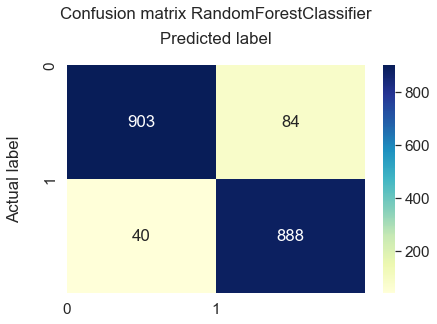

In [ ]:
#visualize Confusion Matrix:
pd.crosstab(y_test,pd.Series(Rfc_pred),
rownames=['ACTUAL'],colnames=['PRED'])
# cm = confusion_matrix(y_test, Gbc_pred)
df_cm = pd.DataFrame(confusion_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix RandomForestClassifier\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### GradientBoostingClassifier

In [ ]:
Gbc = GradientBoostingClassifier()
Gbc.fit(X_train, y_train)
# make the predictions
Gbc_pred = Gbc.predict(X_test)
# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Gbc_pred)
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Gbc_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       987
           1       0.90      0.89      0.90       928

    accuracy                           0.90      1915
   macro avg       0.90      0.90      0.90      1915
weighted avg       0.90      0.90      0.90      1915



Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

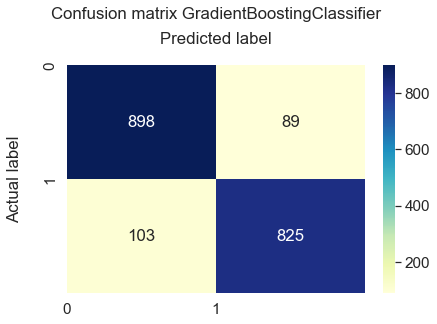

In [ ]:
#visualize Confusion Matrix:
pd.crosstab(y_test,pd.Series(Gbc_pred),
rownames=['ACTUAL'],colnames=['PRED'])
df_cm = pd.DataFrame(confusion_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix GradientBoostingClassifier\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')